# Logistic regression and gradient descent basics

In [2]:
import sympy

### Define variables and functions

In [4]:
x0,x1,x2 = sympy.var('x0,x1,x2')

f = sympy.Matrix([x0**2+x1*x2, x0+x1+x2])
g = sympy.Matrix([sympy.sin(x0), x1**3+x0*x1, x2])

### Map function g on parameters of function f

In [5]:
substitution_fg = {'x0':g[0], 'x1':g[1], 'x2':g[2]}

### Function compozition fog = f(g(x))

In [6]:
fog = f.subs(substitution_fg)

### Direct Jacobian matrix

In [7]:
Jfog = fog.jacobian([x0,x1,x2])
Jfog.simplify()
sympy.pprint(Jfog)

⎡                      ⎛         2⎞     ⎛       2⎞⎤
⎢x₁⋅x₂ + sin(2⋅x₀)  x₂⋅⎝x₀ + 3⋅x₁ ⎠  x₁⋅⎝x₀ + x₁ ⎠⎥
⎢                                                 ⎥
⎢                              2                  ⎥
⎣  x₁ + cos(x₀)       x₀ + 3⋅x₁            1      ⎦


### Jacobian of each function

In [8]:
Jf = f.jacobian([x0,x1,x2])
Jg = g.jacobian([x0,x1,x2])

### Rule of chaining

In [9]:
Jfog2 = Jf.subs(substitution_fg)*Jg
Jfog2.simplify()
sympy.pprint(Jfog2)

⎡                      ⎛         2⎞     ⎛       2⎞⎤
⎢x₁⋅x₂ + sin(2⋅x₀)  x₂⋅⎝x₀ + 3⋅x₁ ⎠  x₁⋅⎝x₀ + x₁ ⎠⎥
⎢                                                 ⎥
⎢                              2                  ⎥
⎣  x₁ + cos(x₀)       x₀ + 3⋅x₁            1      ⎦


### Hessian matrix

In [10]:
f0 = sympy.Matrix([f[0]])
Jf0 = f0.jacobian([x0,x1,x2])

H = Jf0.jacobian([x0,x1,x2])
sympy.pprint(H)

⎡2  0  0⎤
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎣0  1  0⎦


## Class Random2DGaussian

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, average_precision_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
class Random2DGaussian():
    np.random.seed(100)
    
    def __init__(self):
        self.min_x = 0
        self.max_x = 10
        self.min_y = 0
        self.max_y = 10
        
        centar_x = np.random.random_sample()
        centar_y = np.random.random_sample()
        self.mean = np.array([centar_x, centar_y])
        
        eigval_x = (np.random.random_sample()*(self.max_x - self.min_x)/5)**2
        eigval_y = (np.random.random_sample()*(self.max_y - self.min_y)/5)**2
        
        D = np.array([[eigval_x, 0], [0, eigval_y]])
        R = np.array([[45, 0], [0, 45]])
        
        self.covariance_matrix = R.T * D * R
    
    def get_sample(self, n, show=False):
        assert(n > 0)

        if show:
            print ('Mean:\n', self.mean)
            print ('\nCovariance matrix:\n', self.covariance_matrix)
        
        x, y = np.random.multivariate_normal(self.mean, self.covariance_matrix, size=n).T
        return np.column_stack((x, y))

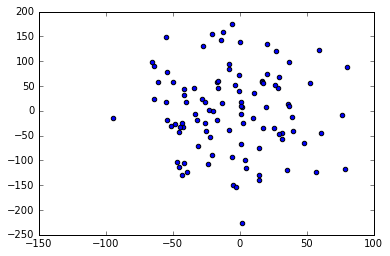

In [13]:
G = Random2DGaussian()
X = G.get_sample(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [20]:
'''
Argumenti
  X:  podatci, np.array Nx2
  Y_: indeksi razreda, np.array Nx1

Povratne vrijednosti
  w, b: parametri logističke regresije
'''
def binlogreg_train(X,Y_):
    b = 0
    w = np.random.randn(2)
    
    # HYPERPARAMETERS
    param_niter = 50
    param_delta = 0.1
    
    # gradijentni spust (param_niter iteracija)
    for i in range(param_niter):
        # klasifikacijski rezultati
        scores = np.dot(X, w) + b
        #print 'Scores', scores

        # vjerojatnosti razreda c_1
        probs = float(1) / (1 + np.exp(-scores))
        #probs = np.exp(scores) / (1 + np.exp(scores))
        #print 'probs', probs

        # gubitak
        loss  = np.sum(-np.log(probs))

        # dijagnosticki ispis
        if i % 10 == 0:
            print("iteration {}: loss {}".format(i, loss))

        # derivacije gubitka po klasifikacijskom rezultatu
        dL_dscores = scores - probs
        #print 'dL_dscores', dL_dscores

        # gradijenti parametara
        grad_w = np.dot(dL_dscores, X)
        grad_b = np.sum(dL_dscores)
        #print 'grad_w', grad_w
        #print 'grad_b', grad_b

        # poboljšani parametri
        w += -param_delta * grad_w
        b += -param_delta * grad_b

    return w, b

In [21]:
'''
  Argumenti
      X:    podatci, np.array Nx2
      w, b: parametri logističke regresije

  Povratne vrijednosti
      probs: vjerojatnosti razreda c1
'''
def binlogreg_classify(X, w, b):
    pred_prob = np.dot(w, X.T) + b
    probs = np.where(pred_prob >= .5, 1, 0)
    return probs

In [22]:
def sample_gauss_2d(C, N):
    G = Random2DGaussian()
    Y_ = np.random.choice([0, 1], size=(N,), p=[1./2, 1./2])
    return G.get_sample(N), Y_

In [23]:
def eval_perf_binary(Y, Y_):
    return accuracy_score(Y, Y_), recall_score(Y, Y_), precision_score(Y, Y_)

In [25]:
def eval_AP(Y_sorted):
    return 0.5
    
print (eval_AP([0,0,0,1,1,1]))
#1.0
print (eval_AP([0,0,1,0,1,1]))
#0.9166666666666666
print (eval_AP([0,1,0,1,0,1]))
#0.7555555555555555
print (eval_AP([1,0,1,0,1,0]))
#0.5

0.5
0.5
0.5
0.5


In [27]:
np.random.seed(100)

# get the training dataset
X,Y_ = sample_gauss_2d(2, 100)

# train the model
w,b = binlogreg_train(X, Y_)

# evaluate the model on the training dataset
probs = binlogreg_classify(X, w,b)
Y = np.where(probs >= .5, 1, 0)

# report performance
accuracy, recall, precision = eval_perf_binary(Y, Y_)
AP = eval_AP(Y_[probs.argsort()])

print (accuracy, recall, precision, AP)

iteration 0: loss 3249.6326693408014
iteration 10: loss inf
iteration 20: loss inf
iteration 30: loss inf
iteration 40: loss inf
0.56 0.545454545455 0.5 0.5


/home/weenkus/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: overflow encountered in exp
/home/weenkus/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log


[[ 22.  28.]
 [ 49.  64.]]


In [ ]:
import tensorflow as tf
# oblikovanje računskog grafa
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print (sess.run(c))